# Logistic regression in Tensorflow

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


## Pre-processing data

In [2]:
# Load from sklearn
iris = load_iris()

print(type(iris))
print('Features shape:', iris.data.shape)
print('Target shape:', iris.target.shape)

<class 'sklearn.utils.Bunch'>
Features shape: (150, 4)
Target shape: (150,)


**Features**

In [3]:
# Visualization with pandas
features = pd.DataFrame(iris.data, columns=['Petal length', 'Petal Width', 'Sepal Length', 'Sepal Width'])
features.head()

,Petal length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Target: species**
        
- Iris setosa: 0
- Iris virginica: 1
- Iris versicolor: 2

In [4]:
df_target = pd.DataFrame(iris.target, columns = ['Species'])
df_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [5]:
df_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


**One-hot-encoding**

In [6]:
# Get np.array with .values
iris_X = features.values

# One-hot-encoding using get_dummies from pandas
iris_y = pd.get_dummies(df_target['Species']).values

iris_y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

**Train Test split**

In [7]:
trainX, testX, trainy, testy = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [8]:
print('Train features shape:', trainX.shape)
print('Test features shape:', testX.shape)

Train features shape: (100, 4)
Test features shape: (50, 4)


In [10]:
trainX.dtype

dtype('float64')

In [11]:
trainy.dtype

dtype('uint8')

## Tensorflow model

**Placeholders**


In [9]:
numFeatures = trainX.shape[1] # = 4
numLabels = trainy.shape[1] # = 3

# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures])
y = tf.placeholder(tf.float32, [None, numLabels])

**Initialize W and b**

In [10]:
weights = tf.Variable(tf.random_normal([numFeatures, numLabels], stddev=0.01))
bias = tf.Variable(tf.random_normal([1, numLabels], stddev=0.01))

# Initialize our weights and biases variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Visualize weights and bias
print('Weights:\n', sess.run(weights))
print('\nBias:\n', sess.run(bias))

Weights:
 [[ 0.00097141 -0.00056427 -0.00764808]
 [-0.00275531 -0.00263027  0.01361109]
 [ 0.00304266  0.00896487 -0.01419067]
 [-0.00759915 -0.01112251 -0.00357113]]

Bias:
 [[-0.00825171  0.00443344 -0.00486965]]


**Model**

$$
ŷ =sigmoid(WX+b)
$$


In [11]:
yhat = tf.nn.sigmoid(tf.add(tf.matmul(X, weights), bias))

**Hyperparameters**

In [12]:
epochs = 700
learning_rate = 0.0008

**Loss and Optimizer**

The cost function and the optimizer are the most critical definitions. I used cross entropy:


- cross_entropy = tf.reduce_mean(-(y * tf.log(yhat) + (1 - y) * tf.log(1 - yhat)))


And the accuracy did not change, the model did not work.

In [13]:
cost = tf.nn.l2_loss(yhat-y)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Training

**Acuraccy**

In [14]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label

correct  = tf.equal(tf.argmax(yhat,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

*Simple model*

In [15]:
# for epoch in range(epochs):
#     _, loss = sess.run([optimizer, cost], feed_dict={X: trainX, y: trainy})
#     if epoch % 100 == 0:
#         print('Epoch:', epoch,
#               'Loss: ', loss)

*With accuracity*

In [16]:
# for epoch in range(epochs):
#     _, loss_train, accuracy_train = sess.run([optimizer, cost, accuracy], feed_dict={X: trainX, y: trainy})
#     accuracy_test = sess.run(accuracy, feed_dict={X: testX, y: testy})
#     if epoch % 10 == 0:
#         print('Epoch:', epoch,
#               'Training loss: ', loss_train,
#               'Accuracy:', accuracy_train)
# print('Accuracy on test set:', accuracy_test)

*With data for graphics*

In [17]:
train_accuracy = []
train_losses = []
test_losses = []

for epoch in range(epochs):
    _, loss_train, accuracy_train = sess.run([optimizer, cost, accuracy], feed_dict={X: trainX, y: trainy})
    loss_test,accuracy_test = sess.run([cost, accuracy], feed_dict={X: testX, y: testy})
    
    if epoch % 10 == 0:
        train_losses.append(loss_train)
        test_losses.append(loss_test)
        train_accuracy.append(accuracy_train)
        print('Epoch:', epoch,
              'Training loss: ', loss_train,
              'training accuracy:', accuracy_train)

print('Accuracy on test set:', accuracy_test)

Epoch: 0 Training loss:  37.530907 training accuracy: 0.35
Epoch: 10 Training loss:  30.683764 training accuracy: 0.36
Epoch: 20 Training loss:  28.640072 training accuracy: 0.65
Epoch: 30 Training loss:  26.914568 training accuracy: 0.65
Epoch: 40 Training loss:  25.48103 training accuracy: 0.65
Epoch: 50 Training loss:  24.298058 training accuracy: 0.65
Epoch: 60 Training loss:  23.320423 training accuracy: 0.65
Epoch: 70 Training loss:  22.50729 training accuracy: 0.65
Epoch: 80 Training loss:  21.824854 training accuracy: 0.65
Epoch: 90 Training loss:  21.246246 training accuracy: 0.65
Epoch: 100 Training loss:  20.750504 training accuracy: 0.65
Epoch: 110 Training loss:  20.321377 training accuracy: 0.67
Epoch: 120 Training loss:  19.946262 training accuracy: 0.67
Epoch: 130 Training loss:  19.615328 training accuracy: 0.67
Epoch: 140 Training loss:  19.320873 training accuracy: 0.67
Epoch: 150 Training loss:  19.056793 training accuracy: 0.67
Epoch: 160 Training loss:  18.818228 

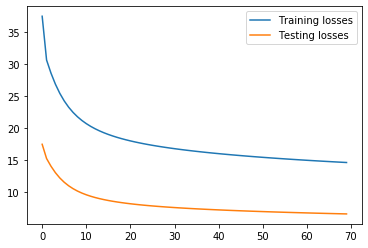

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_losses, label = 'Training losses')
plt.plot(test_losses, label = 'Testing losses')
plt.legend()

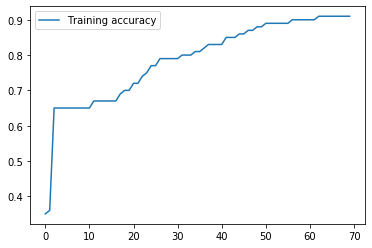

In [19]:
plt.plot(train_accuracy, label = 'Training accuracy')
plt.legend()

(al principio no corría bien, cambié la función de costo y quité la estandarización (mean=0.std=1))

**Evaluation with sigmoid function**

In [20]:
Ws = weights.eval(session=sess)
bs = sess.run(bias)

# Convert to float32
trainx = np.float32(trainX)
trainx.dtype

print('weight:\n', Ws, '\n\nbias:', bs)

weight:
 [[ 0.24230081  0.07764875 -0.7261136 ]
 [ 0.8108393  -0.59981304 -0.6767521 ]
 [-1.281629    0.24762852  1.1131625 ]
 [-0.5798067  -0.27400658  0.85911435]] 

bias: [[ 0.14169301  0.11554784 -0.36163023]]


In [21]:
yhat = tf.nn.sigmoid(tf.add(tf.matmul(trainx, weights), bias))
pred = sess.run(yhat)
pred[0:5]

array([[0.09428966, 0.37813285, 0.33828914],
       [0.00516507, 0.4912943 , 0.77567935],
       [0.06262347, 0.3668534 , 0.46003056],
       [0.90930045, 0.21485406, 0.00898483],
       [0.0041987 , 0.53620267, 0.7906431 ]], dtype=float32)

In [22]:
np.sum(pred[0]) # no tiene por qué sumar 1

0.8107116

In [23]:
# Choose the value max of each row: in the first row the middle value is the highest, in the second row the third and so on 
argmax = tf.argmax(yhat,1)
labels = sess.run(argmax)
labels

array([1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

In [24]:
argmax = tf.argmax(trainy,1)
labels_true = sess.run(argmax)
labels_true

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

**With Softmax function**

In [25]:
yhat_ = tf.nn.softmax(tf.add(tf.matmul(trainx, weights), bias))
pred_ = sess.run(yhat_)
pred_[0:5]

array([[8.5095398e-02, 4.9702501e-01, 4.1787961e-01],
       [1.1722951e-03, 2.1806316e-01, 7.8076464e-01],
       [4.4592325e-02, 3.8674539e-01, 5.6866229e-01],
       [9.7257364e-01, 2.6546886e-02, 8.7952887e-04],
       [8.5406908e-04, 2.3417987e-01, 7.6496607e-01]], dtype=float32)

In [26]:
a = []
for i in range(len(pred_)):   
    b = np.sum(pred_[i])
    a.append(b)
print(a[0:5])

[1.0, 1.0000001, 1.0, 1.0000001, 1.0]
